In [1]:
import nltk 
import string
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
# %matplotlib inline

In [2]:
df_alexa = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [3]:
positive = df_alexa[df_alexa['feedback']==1]
negative = df_alexa[df_alexa['feedback']==0]

In [4]:
words = df_alexa['verified_reviews'].tolist()

In [5]:
from nltk import word_tokenize
def ultimate_tokenize(sentence):
    # Remove punctuation and digits
    sentence = sentence.translate(str.maketrans('', '', string.punctuation + string.digits))
    return word_tokenize(sentence.lower())

In [6]:
def cleaning(raw_review):
    
    tokens = ultimate_tokenize(raw_review)
    from nltk.corpus import stopwords

    stops = stopwords.words('english')
    stops.extend('.,[,],(,),;,/,-,\',?,",:,<,>,n\'t,|,#,\'s,\",\'re,\'ve,\'ll,\'d,\'re,’'.split(','))
    stops.extend(',')
    
    # 6. Remove stop words. 
    words = [w for w in tokens if not w in stops]
    
    # 7. Stemming
    words = [nltk.stem.SnowballStemmer('english').stem(w) for w in words]
    
    # 8. Join the words back into one string separated by space, and return the result.
    return " ".join(words)


In [7]:
df_alexa['clean_reviews']=df_alexa['verified_reviews'].apply(cleaning)
df_alexa.tail()

,rating,date,variation,verified_reviews,feedback,clean_reviews
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect kid adult everyon
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listen music search locat check time look weat...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,love thing run entir home tv light thermostat ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,complaint sound qualiti isnt great most use co...
3149,4,29-Jul-18,Black Dot,Good,1,good


In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [9]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

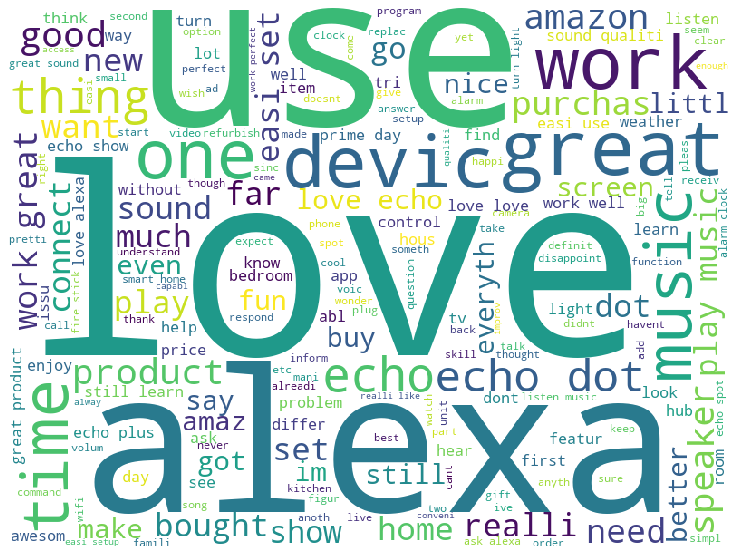

In [10]:
cloud(' '.join(df_alexa['clean_reviews']))

In [11]:
df_alexa['freq_word'] = df_alexa['clean_reviews'].apply(lambda x: len(str(x).split()))
df_alexa['unique_freq_word'] = df_alexa['clean_reviews'].apply(lambda x: len(set(str(x).split())))


median of word frequency:  7.0
median of unique word frequency:  7.0


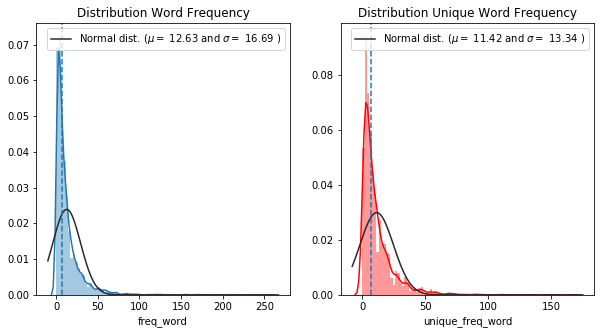

In [12]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10,5)

sns.distplot(df_alexa['freq_word'], bins = 90, ax=axes[0], fit = stats.norm)
(mu0, sigma0) = stats.norm.fit(df_alexa['freq_word'])
axes[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu0, sigma0)],loc='best')
axes[0].set_title("Distribution Word Frequency")
axes[0].axvline(df_alexa['freq_word'].median(), linestyle='dashed')
print("median of word frequency: ", df_alexa['freq_word'].median())


sns.distplot(df_alexa['unique_freq_word'], bins = 90, ax=axes[1], color = 'r', fit = stats.norm)
(mu1, sigma1) = stats.norm.fit(df_alexa['unique_freq_word'])
axes[1].set_title("Distribution Unique Word Frequency")
axes[1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu1, sigma1)],loc='best')
axes[1].axvline(df_alexa['unique_freq_word'].median(), linestyle='dashed')
print("median of unique word frequency: ", df_alexa['unique_freq_word'].median())

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 18000,
                             min_df = 2,
                             ngram_range = (1,3)
                            )

In [15]:
from sklearn.pipeline import Pipeline
pipe = Pipeline( [('vect', vectorizer)] )

In [16]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [17]:
X = df_alexa['clean_reviews'].tolist()

In [18]:
Y = df_alexa['feedback'].tolist()

In [19]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
#Effective Train-70%, Validation-15%, Test-15% breakup

In [20]:
print(len(Y_train))

2205


In [21]:
X_train = pipe.fit_transform(X_train)
X_val = pipe.transform(X_val)
X_test=pipe.transform(X_test)
print('train dim:', X_train.shape, 'test dim:', X_val.shape)


train dim: (2205, 8826) test dim: (472, 8826)


In [22]:
lexi = vectorizer.get_feature_names()

In [23]:
lexi[:5]

['abil', 'abil alexa', 'abil exampl', 'abil exampl smart', 'abil play']

In [24]:
X_sum = pd.DataFrame(np.sum(X_train, axis=0), columns = lexi)

In [25]:
X_sum.head()

,abil,abil alexa,abil exampl,abil exampl smart,abil play,abil play video,abl,abl access,abl add,abl add speaker,...,yet right most,yet sure,yet thing,yet thing right,youd,your,youtub,youtub video,zigbe,zwave
0,22,2,2,2,3,2,74,2,2,2,...,2,2,2,2,2,8,25,6,3,3


In [26]:
df_alexa['length'] = df_alexa['clean_reviews'].apply(len)
max_tokens = ultimate_tokenize(df_alexa[df_alexa['length'] == df_alexa['length'].max()]['clean_reviews'].iloc[0])
max_words= len(max_tokens)
max_words

257

Neural Network USING MLPClassifier from sklearn library

In [27]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [28]:
kfold = StratifiedKFold( n_splits = 8, random_state = None )

In [29]:
 mlp_param_grid = {
    'hidden_layer_sizes':[4,],
    'activation':['tanh'],
    'solver':['sgd'],
    'alpha':[0.0001],
    'learning_rate':['constant'],
    'max_iter':[1000]
}

gsMLP = GridSearchCV(MLPClassifier(), param_grid = mlp_param_grid, 
                    cv = kfold, scoring = 'roc_auc', n_jobs= -1, verbose = 1)
gsMLP.fit(X_train,Y_train)
print(gsMLP.best_params_)
mlp_best0 = gsMLP.best_estimator_
print("Accuracy:",gsMLP.best_score_)

Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  1.3min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.4min finished


{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}
Accuracy: 0.9018930510591879


In [30]:
print(gsMLP.best_score_)

0.9018930510591879


In [31]:
gsMLP.estimator.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [32]:
pred_Y_val = gsMLP.predict(X_val)

In [33]:
right =0
for i in range(len(Y_val)):
    if(pred_Y_val[i]==Y_val[i]):
        right+=1
print("Accuracy:",(right/len(Y_val))) 

Accuracy: 0.9279661016949152


In [34]:
X_test.shape
X_val.shape

(472, 8826)

In [35]:
pred_Y_test = gsMLP.predict(X_test)

In [36]:
right =0
for i in range(len(Y_test)):
    if(pred_Y_test[i]==Y_test[i]):
        right+=1
print("Accuracy:",(right/len(Y_test))) 

Accuracy: 0.9513742071881607
